In [1]:
import sys

sys.path.append("..")
import torch as th
import itertools
import atomium
import pandas as pd

from feature.base import GraphData

attempted relative import beyond top-level package


In [2]:

dataset = "/home/nfs/rmadaj/DeepSocket_prepare/data/feb24/feb24_full.pkl"
dataset = pd.read_pickle(dataset)
#dataset = dataset[dataset.is_valid == True]

In [3]:
r = th.rand((300, 3))
norm = th.linalg.vector_norm(r, ord=2, dim=1)

In [5]:
resdata = list()
conndata = list()
for idx, row in dataset.iterrows():
    try:
        gr = GraphData.from_pdb(row.path)
    except Exception as e:
        print(e)
        continue
    resdata.append(gr.to_nodedf())
    conndata.append(gr.to_edgedf())
    print(idx)
    if idx > 88:
        break

number of residues is different then CA atoms 162 and 163
1
number of residues is different then CA atoms 157 and 159
number of residues is different then CA atoms 162 and 164
4
5
6
7


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
split_with_sizes expects split_sizes to sum exactly to 4342 (input tensor's size at dimension 0), but got split_sizes=[5, 5, 8, 9, 7, 7, 8, 6, 4, 5, 7, 6, 5, 8, 7, 8, 11, 7, 7, 4, 9, 9, 7, 8, 7, 9, 4, 5, 5, 8, 9, 7, 7, 7, 11, 8, 10, 8, 8, 10, 9, 9, 9, 8, 5, 8, 6, 9, 7, 6, 10, 10, 7, 4, 8, 7, 7, 9, 6, 6, 7, 6, 10, 7, 7, 9, 4, 9, 5, 9, 4, 8, 12, 13, 7, 8, 8, 11, 5, 8, 10, 5, 7, 8, 8, 5, 5, 11, 5, 9, 4, 8, 7, 7, 7, 6, 6, 7, 6, 6, 10, 18, 12, 9, 7, 9, 9, 11, 11, 9, 6, 5, 4, 6, 10, 5, 8, 7, 7, 7, 9, 8, 8, 9, 5, 14, 6, 5, 7, 6, 10, 8, 8, 7, 7, 6, 8, 7, 7, 6, 9, 8, 9, 9, 4, 8, 5, 4, 7, 8, 8, 7, 4, 8, 8, 9, 5, 8, 5, 5, 9, 7, 7, 8, 5, 9, 5, 7, 7, 5, 7, 10, 6, 7, 8, 8, 5, 7, 12, 9, 7, 7, 8, 8, 5, 8, 5, 8, 9, 12, 9, 7, 6, 8, 11, 7, 10, 11, 11, 10, 8, 7, 6, 8, 8, 15, 6, 8, 9,

In [ ]:
import torch as th
from torch import linalg as LA

ca = th.rand((156, 3))
c = th.rand((156, 3))
n = th.rand((156, 3))


b1 = ca - c
b2 = c.roll(1) - n.roll(1)
b3 = n.roll(1) - ca.roll(1)
n1 = th.cross(b1, b2)
n1 /= LA.vector_norm(n1, ord=2, dim=1, keepdim=True)
n2 = th.cross(b2, b3)
n2 /= LA.vector_norm(n2, ord=2, dim=1, keepdim=True)
# normalize b2 
#b2 /= LA.vector_norm(b2, ord=2, dim=1, keepdim=True)
#m1 = th.cross(n1, b2)
#x = (n1 * n2).sum(1)
#y = (m1 * n2).sum(1)
b_cross23 = th.cross(b2, b3)
b_cross12 = th.cross(b1, b2)
b2_norm = LA.vector_norm(b2, ord=2, dim=1, keepdim=True)
b_cross1223 = (b_cross12*b_cross23).sum(1, keepdim=True).sqrt()
b21 = b2_norm*(b1*b_cross23).sum(1, keepdim=True).sqrt()
dihedral = th.atan2(b21, b_cross1223)
phi = dihedral
psi = dihedral.roll(1)
# fill borders
phi[0] = 0
psi[0] = 0

In [ ]:
psi.shape, psi.shape, b21.shape, b_cross1223.shape, th.atan2(b21, b_cross1223).shape

(torch.Size([156, 1]),
 torch.Size([156, 1]),
 torch.Size([156, 1]),
 torch.Size([156, 1]),
 torch.Size([156, 1]))

In [ ]:
(b_cross12, b_cross23).sum(1, keepdim=True)

AttributeError: 'tuple' object has no attribute 'sum'

In [ ]:
b2_norm.shape, th.dot(b1, b_cross23).shape, b1.shape

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [ ]:
b_cross23.shape

torch.Size([156, 3])

In [7]:
resdf = pd.concat(resdata, ignore_index=True)

(-3.14, 3.14)

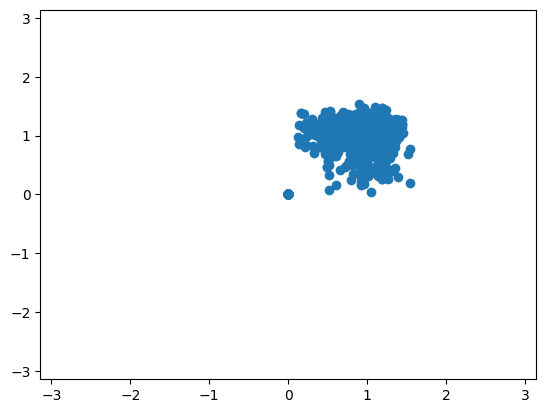

In [9]:
import matplotlib.pyplot as plt


plt.scatter(resdf.phi, resdf.psi)
plt.xlim([-3.14, 3.14])
plt.ylim([-3.14, 3.14])

In [ ]:
resdf

,phi,psi,chi1,chi2,residue
0,0.000000,0.000000,0.000000,0.000000,MET
1,2.993855,-1.543115,NaN,NaN,VAL
2,0.329229,2.993855,NaN,NaN,LEU
3,-2.820583,0.329229,NaN,NaN,SER
4,1.696506,-2.820583,NaN,NaN,GLU
...,...,...,...,...,...
18262,-1.151830,1.491983,0.357584,2.183325,GLN
18263,-2.267871,-1.151830,-0.563003,0.357584,TYR
18264,2.595466,-2.267871,1.444414,-0.563003,LEU
18265,1.570211,2.595466,1.747484,1.444414,PHE
